# Pyber Challenge

### Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


# File to Load
city_data_to_load = Path("/Users/jeremy/Docs/OSU_Bootcamp/Mod_5_PyBer/PyBer_Analysis/Resources/city_data.csv")
ride_data_to_load = Path("/Users/jeremy/Docs/OSU_Bootcamp/Mod_5_PyBer/PyBer_Analysis/Resources/ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

###  1. Get the total rides for each city type


In [3]:
rides_by_type = pyber_data.groupby('type').count()['ride_id']
rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

### 2. Get the total drivers for each city type


In [4]:
drivers_by_type = city_data_df.groupby('type').sum()['driver_count']
drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

###  3. Get the total amount of fares for each city type


In [5]:
fares_by_type = pyber_data.groupby('type').sum()['fare']
fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

###  4. Get the average fare per ride for each city type. 


In [6]:
avg_fare_per_ride = round(fares_by_type/rides_by_type,2)
avg_fare_per_ride

type
Rural       34.62
Suburban    30.97
Urban       24.53
dtype: float64

### 5. Get the average fare per driver for each city type. 


In [7]:

avg_fare_per_driver = round(fares_by_type/drivers_by_type,2)
avg_fare_per_driver

type
Rural       55.49
Suburban    39.50
Urban       16.57
dtype: float64

###  6. Create a PyBer summary DataFrame. 


In [8]:

pyber_summary_df = pd.concat([rides_by_type,drivers_by_type,fares_by_type,avg_fare_per_ride,avg_fare_per_driver], axis=1)
pyber_summary_df = pyber_summary_df.rename(columns={'ride_id':'Total Rides','driver_count':'Total Drivers','fare':'Total Fare',0:"Avg Fare per Ride",1:'Avg Fare per Driver' })

In [9]:
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fare,Avg Fare per Ride,Avg Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.62,55.49
Suburban,625,490,19356.33,30.97,39.50
Urban,1625,2405,39854.38,24.53,16.57


###  7. Cleaning up the DataFrame. Delete the index name

In [10]:

pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fare,Avg Fare per Ride,Avg Fare per Driver
Rural,125,78,4327.93,34.62,55.49
Suburban,625,490,19356.33,30.97,39.50
Urban,1625,2405,39854.38,24.53,16.57


###  8. Format the columns.


In [11]:

pyber_formatted_df = pyber_summary_df

In [12]:
pyber_formatted_df['Total Rides'] =[format(x,',.0f') for x in pyber_formatted_df['Total Rides']]


In [13]:
pyber_formatted_df['Total Drivers'] =[format(x,',.0f') for x in pyber_formatted_df['Total Drivers']]


In [14]:

pyber_formatted_df['Total Fare'] =[format(x,',.2f') for x in pyber_formatted_df['Total Fare']]
# pyber_summary_df['Total Fare'] = pyber_summary_df['Total Fare'].astype(str)
pyber_formatted_df['Total Fare'] ='$' + pyber_formatted_df['Total Fare']



In [15]:
pyber_formatted_df['Avg Fare per Ride']= pyber_formatted_df['Avg Fare per Ride'].astype(str)

pyber_formatted_df['Avg Fare per Ride'] =['$'+ x for x in pyber_formatted_df['Avg Fare per Ride']]



In [16]:
pyber_formatted_df['Avg Fare per Driver']= pyber_formatted_df['Avg Fare per Driver'].astype(str)

pyber_formatted_df['Avg Fare per Driver'] ='$' + pyber_formatted_df['Avg Fare per Driver']


In [17]:
pyber_formatted_df.head()

,Total Rides,Total Drivers,Total Fare,Avg Fare per Ride,Avg Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.5
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [18]:
# 1. Read the merged DataFrame
pyber_data

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


### Create a new DataFrame showing the sum of the fares for each date where the indices are the city type and date.


In [19]:
pyber_pivot = pyber_data.groupby(['date','type']).sum()[['fare']]
pyber_pivot

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


### Reset index

In [20]:
pyber_pivot = pyber_pivot.reset_index()
pyber_pivot.head()

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75


### Use pivot to create a cleaner df

In [21]:
pyber_pivot = pyber_pivot.pivot(index='date',columns='type',values='fare')
pyber_pivot


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


### Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'

In [22]:
new_pyber_pivot = pyber_pivot.loc['2019-01-01':'2019-04-29']
new_pyber_pivot


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


### Set the "date" index to datetime datatype.

In [23]:
new_pyber_pivot.index = pd.to_datetime(new_pyber_pivot.index)
new_pyber_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


### Check that the datatype for the index is datetime using df.info()


In [24]:
new_pyber_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


### Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.


In [25]:
new_pyber_pivot = new_pyber_pivot.resample('W').sum()
new_pyber_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


### Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

In [26]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

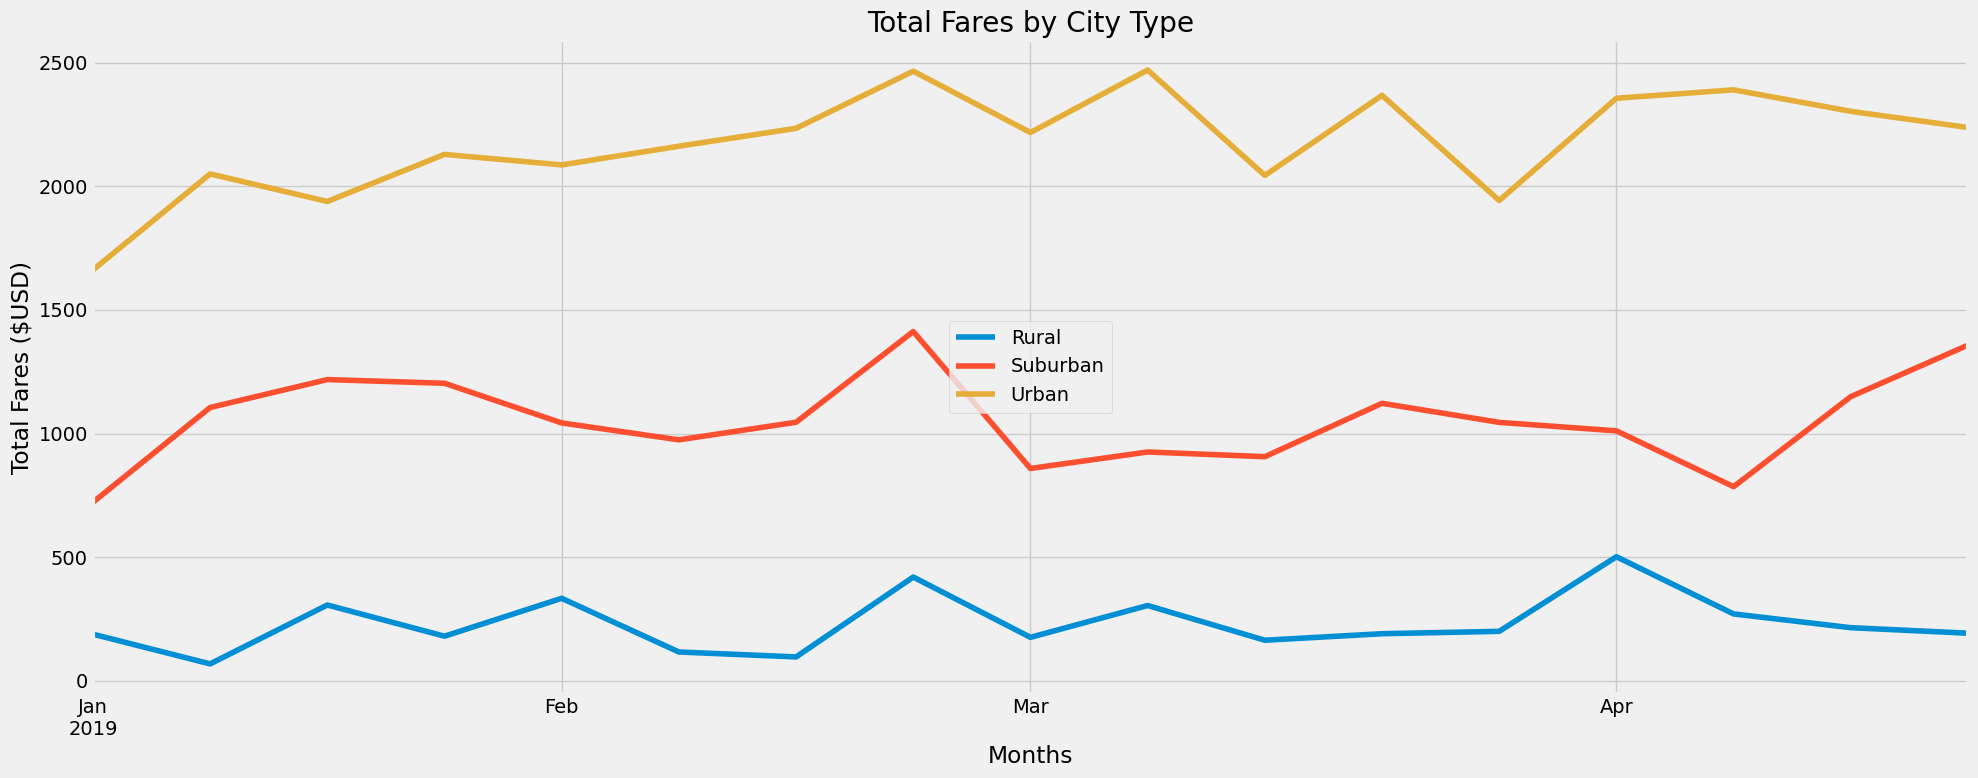

In [30]:

new_pyber_pivot.plot(
    kind='line',
    figsize=(20,8))
plt.ylabel('Total Fares ($USD)')
plt.xlabel('Months')
plt.title('Total Fares by City Type')
plt.legend(loc='center')
plt.tight_layout()
plt.savefig('./analysis/Pyber_fare_summary.png')
